# Data Analysis Template

## Import libraries

In [147]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, pearsonr, spearmanr, f_oneway, levene

1. Find and Load Data
2. Initial Exploration
3. Initial Questions
4. Clean Data / Transform Data
5. Context
6. Hypothesis Test
7. Regression

## Load Data

* What kind of data do you have?
  * Do you have enough data to do basic tests?
  * Is your data reliable / trustworthy?
    * Where did the data come from?
  * Is your data representative of what you're analyzing?
    * (e.g. the average height of the professional athletes may not be
      representative of the average height of the general population)
* What format is your data in?
  * Common types that can be read by Pandas
    * CSV
    * Excel
    * Json
      * Will require more effort defining loading parameters
  * SQL data can be loaded into a DataFrame after you connect to the database
    with another library (e.g. psycopg2, sqlalchemy)

Testing getting file path before file using os

In [88]:
database = '../users/amheard0311/data/train.csv'
parent = os.path.dirname(database)
parent

'../users/amheard0311/data'

Import data set

In [89]:
socialmedia_db = pd.read_csv('../data/train.csv')
socialmedia_db.T

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
User_ID,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
Age,25,30,22,28,33,21,27,24,29,31,...,27,32,24,29,26,33,22,35,28,27
Gender,Female,Male,Non-binary,Female,Male,Male,Female,Non-binary,Female,Male,...,Non-binary,Female,Male,Female,Male,Non-binary,Female,Male,Non-binary,Female
Platform,Instagram,Twitter,Facebook,Instagram,LinkedIn,Instagram,Twitter,Facebook,LinkedIn,Instagram,...,Facebook,Whatsapp,Telegram,Snapchat,Instagram,Twitter,Facebook,Whatsapp,Telegram,Snapchat
Daily_Usage_Time (minutes),120.0,90.0,60.0,200.0,45.0,150.0,85.0,110.0,55.0,170.0,...,50.0,105.0,75.0,95.0,150.0,85.0,70.0,110.0,60.0,120.0
Posts_Per_Day,3.0,5.0,2.0,8.0,1.0,4.0,3.0,6.0,2.0,5.0,...,1.0,4.0,3.0,2.0,5.0,4.0,1.0,3.0,2.0,4.0
Likes_Received_Per_Day,45.0,20.0,15.0,100.0,5.0,60.0,30.0,25.0,10.0,80.0,...,10.0,55.0,37.0,23.0,70.0,35.0,14.0,50.0,18.0,40.0
Comments_Received_Per_Day,10.0,25.0,5.0,30.0,2.0,15.0,10.0,12.0,3.0,20.0,...,4.0,25.0,16.0,10.0,25.0,18.0,6.0,25.0,8.0,18.0
Messages_Sent_Per_Day,12.0,30.0,20.0,50.0,10.0,25.0,18.0,22.0,8.0,35.0,...,10.0,25.0,22.0,28.0,30.0,18.0,10.0,25.0,18.0,22.0
Dominant_Emotion,Happiness,Anger,Neutral,Anxiety,Boredom,Happiness,Anger,Sadness,Neutral,Happiness,...,Boredom,Anger,Neutral,Sadness,Anxiety,Boredom,Neutral,Happiness,Anger,Neutral


## Initial Exploration

* Learn about your data
  * What types of information do you have?
  * How many missing / nan values are in the data?
  * What data types are the different columns?
  * Are there any noticeable patterns in the data?
* Useful tools
  * .describe()
  * .info()
  * Scatter matrix / Pairplot
  * .corr()

shape()

In [90]:
socialmedia_db.shape

(1001, 10)

describe()

In [91]:
# Code Here
socialmedia_db.describe()

,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,95.950000,3.321000,39.898000,15.611000,22.560000
std,38.850442,1.914582,26.393867,8.819493,8.516274
min,40.000000,1.000000,5.000000,2.000000,8.000000
25%,65.000000,2.000000,20.000000,8.000000,17.750000
50%,85.000000,3.000000,33.000000,14.000000,22.000000
75%,120.000000,4.000000,55.000000,22.000000,28.000000
max,200.000000,8.000000,110.000000,40.000000,50.000000


info()

In [92]:
socialmedia_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1001 non-null   object 
 1   Age                         1001 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), object(5)
memory usage: 78.3+ KB


In [93]:
socialmedia_db["Dominant_Emotion"].unique()

array(['Happiness', 'Anger', 'Neutral', 'Anxiety', 'Boredom', 'Sadness',
       nan], dtype=object)

## Initial Question

* Initial Question
  * What types answers do you want the data to provide?
  * Will **THIS** data set be able to inform that question?
* During your exploration of the data did any patterns or quirks provoke any
  questions related to initial question

## Clean Data / Transform Data

### Cleaning Your Data

* Did you split your data in training and testing sets?
  * Why is it usually better but harder to split before cleaning?
    * Are your cleaning choices affecting the data
      * e.g. if you impute values with the mean of a column, is the mean or
        median of that column now different?
  * If you split data before cleaning, how do you make sure that there are a
    consistent set of steps being done for both the training and testing sets?
      * Hint: functions and classes will perform a consistent set of steps
* Are there any null values?
  * How many?
  * In which columns?
* Are there any columns with mostly missing values?
* Why are there missing values?
  * Are values missing at random?
  * Are values missing for a logical reason connected with the data or its collection?
* Are there any rows or columns with typos or incorrect data
  * (e.g. "?", "0" as opposed to 0, "Don't know", ...)
* Are the data types of the columns what you expect?
  * (e.g. dates that are actually strings, numbers pandas interpreted as strings)
* Are there extreme outliers (extreme values) in your data?
  * How should you deal with these?
  * How do they relate to your question? Do you need to keep them?

*Data already split into training and test data

Noticed that age and gender are occasionally swapped, writing code to correct this

In [94]:
# Function identifying if the value can be converted into a integer or not
def can_convert_to_int(value):
    try:
        int(value)
        return True
    except ValueError:
        return False

# Condition to identify rows where values need to be swapped using above function
condition = socialmedia_db.apply(lambda row: can_convert_to_int(row['Gender']), axis=1)

# Using the specified condition, swap the values into the proper column
socialmedia_db.loc[condition, ['Age', 'Gender']] = socialmedia_db.loc[condition, ['Gender', 'Age']].values

# Save this to a new clean csv
socialmedia_db.to_csv('../data/clean_train_1.csv', index=False)
socialmedia_db = pd.read_csv('../data/clean_train_1.csv')

Looking for nulls

In [95]:
# One null found, dropping any rows without full information, given how few columns there are, each value is important to have
socialmedia_db.dropna(inplace=True)

*Looking for potential non-null empty values, appears all is in order

Validating data types

In [96]:
# Age is still seen as an object, forcing them into int16 (memory saving in case the dataset is larger in future cases as age will most likely never exceed 32767)
socialmedia_db['Age'] = socialmedia_db['Age'].astype('int16')
socialmedia_db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1000 non-null   object 
 1   Age                         1000 non-null   int16  
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), int16(1), object(4)
memory usage: 80.1+ KB


Searching for outliers and their validity

In [97]:
for col in socialmedia_db:
    print(col, socialmedia_db[col].max())

User_ID 999
Age 35
Gender Non-binary
Platform Whatsapp
Daily_Usage_Time (minutes) 200.0
Posts_Per_Day 8.0
Likes_Received_Per_Day 110.0
Comments_Received_Per_Day 40.0
Messages_Sent_Per_Day 50.0
Dominant_Emotion Sadness


### Transforming Your Data

* Do you need to scale your data for your analysis?
  * Hypothesis testing - usually no
    * For example, t-test should usually not be scaled before they are
      performed because the variance in the data is part of the interpretation
  * Machine Learning - usually yes
* Do you have any categorical variables that need to be dummy encoded
  * For example, yellow, blue, red colors to three columns like is_yellow,
    is_blue, is_red that have True or False (1 / 0)

Beginning of split for analysis and predictions through machine learning

#### Machine Learning Split

In [98]:
# User ID isn't needed for predictions
socialmedia_ml_db = socialmedia_db.drop("User_ID", axis=1, inplace=True)

# Getting dummies for all categorial variables
socialmedia_ml_db = pd.get_dummies(socialmedia_db)
socialmedia_ml_db


,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Gender_Female,Gender_Male,Gender_Non-binary,Platform_Facebook,...,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp,Dominant_Emotion_Anger,Dominant_Emotion_Anxiety,Dominant_Emotion_Boredom,Dominant_Emotion_Happiness,Dominant_Emotion_Neutral,Dominant_Emotion_Sadness
0,25,120.0,3.0,45.0,10.0,12.0,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,30,90.0,5.0,20.0,25.0,30.0,False,True,False,False,...,False,False,True,False,True,False,False,False,False,False
2,22,60.0,2.0,15.0,5.0,20.0,False,False,True,True,...,False,False,False,False,False,False,False,False,True,False
3,28,200.0,8.0,100.0,30.0,50.0,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,33,45.0,1.0,5.0,2.0,10.0,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,33,85.0,4.0,35.0,18.0,18.0,False,False,True,False,...,False,False,True,False,False,False,True,False,False,False
997,22,70.0,1.0,14.0,6.0,10.0,True,False,False,True,...,False,False,False,False,False,False,False,False,True,False
998,35,110.0,3.0,50.0,25.0,25.0,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
999,28,60.0,2.0,18.0,8.0,18.0,False,False,True,False,...,False,True,False,False,True,False,False,False,False,False


#### Analysis Split

In [99]:
socialmedia_db.columns

Index(['Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

In [100]:
unique_genders = socialmedia_db["Gender"].unique()
unique_platforms = socialmedia_db["Platform"].unique()
unique_emotions = socialmedia_db["Dominant_Emotion"].unique()
print(f"Gender: {unique_genders},\nPlatform: {unique_platforms},\nEmotions: {unique_emotions}")

Gender: ['Female' 'Male' 'Non-binary'],
Platform: ['Instagram' 'Twitter' 'Facebook' 'LinkedIn' 'Whatsapp' 'Telegram'
 'Snapchat'],
Emotions: ['Happiness' 'Anger' 'Neutral' 'Anxiety' 'Boredom' 'Sadness']


In [101]:
socialmedia_db.groupby("Gender")["Dominant_Emotion"].value_counts()

Gender      Dominant_Emotion
Female      Happiness           110
            Anxiety              60
            Anger                60
            Neutral              60
            Sadness              50
            Boredom              30
Male        Happiness            70
            Anxiety              60
            Sadness              60
            Boredom              60
            Anger                60
            Neutral              50
Non-binary  Neutral              90
            Anxiety              50
            Boredom              50
            Sadness              50
            Happiness            20
            Anger                10
Name: count, dtype: int64

In [102]:
gender_columns = ["Gender", "Dominant_Emotion"]
test_socialmedia_db = socialmedia_db[gender_columns]
columns = list(test_socialmedia_db.columns)
test_socialmedia_db.groupby(columns)

## Context

* What information or visualizations does the audience need to understand what
  your analysis is?
* What information or visualizations does the audience need to understand why
  your analysis is important?

#### Initial Graphs

Time spent on social media vs amount of posts, likes recieved, comments, messages sent (line graph)

Emotions totals  (bar chart)

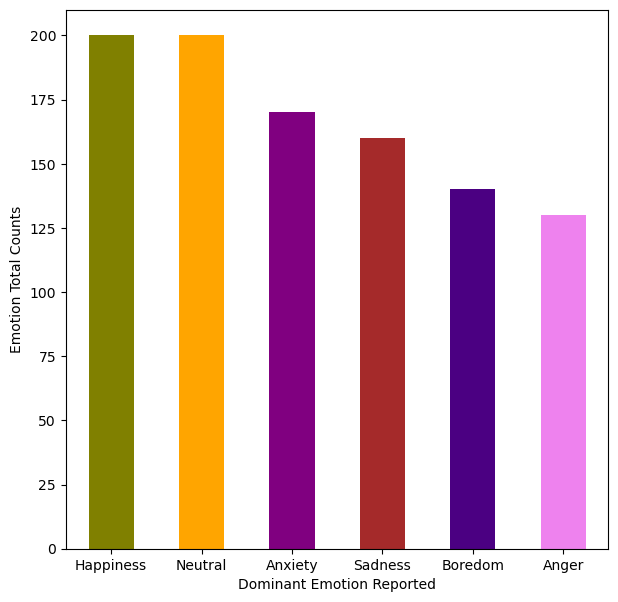

In [142]:
socialmedia_db["Dominant_Emotion"].value_counts().plot(kind='bar', figsize=(7, 7), color=['olive', 'orange', 'purple', 'brown', 'indigo', 'violet'])
plt.ylabel("Emotion Total Counts")
plt.xlabel("Dominant Emotion Reported")
plt.xticks(rotation=0)
plt.savefig('../img/Emotion_Totals.png', bbox_inches='tight')
plt.show() 

Emotional status based on gender

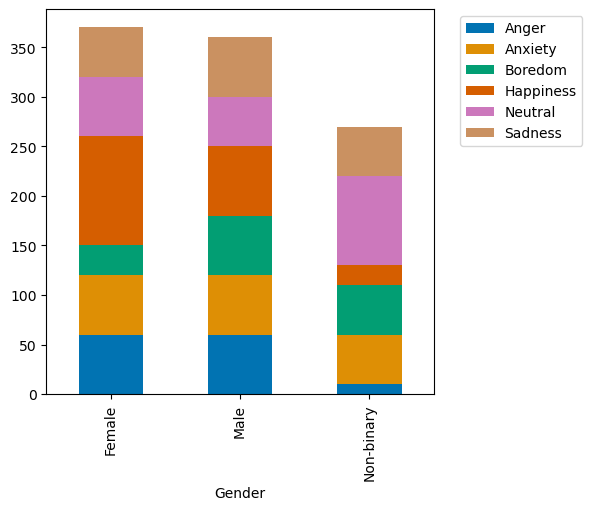

In [103]:
# Create new df using only required fields
gender_columns = ["Gender", "Dominant_Emotion"]
socialmedia__gender_db = socialmedia_db[gender_columns]

# Setting a colorblind-friendly palette
color_palette = sns.set_palette('colorblind')

# Groupby Gender and Emotion
socialmedia__gender_db.groupby(["Gender", "Dominant_Emotion"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5, 5), color=color_palette)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.savefig('../img/Emotion_to_Gender.png', bbox_inches='tight')
plt.show()

Emotional Status regardless of gender, dependant on age

Change age to categorial 5 year increments

C:\Users\amhea\AppData\Local\Temp\ipykernel_22592\3024525657.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  socialmedia_age_db['Age'] = pd.cut(socialmedia_age_db['Age'], bins=bins, labels=labels, right=False)
C:\Users\amhea\AppData\Local\Temp\ipykernel_22592\3024525657.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  emotion_counts = socialmedia_age_db.groupby(['Age', 'Dominant_Emotion']).size().unstack()


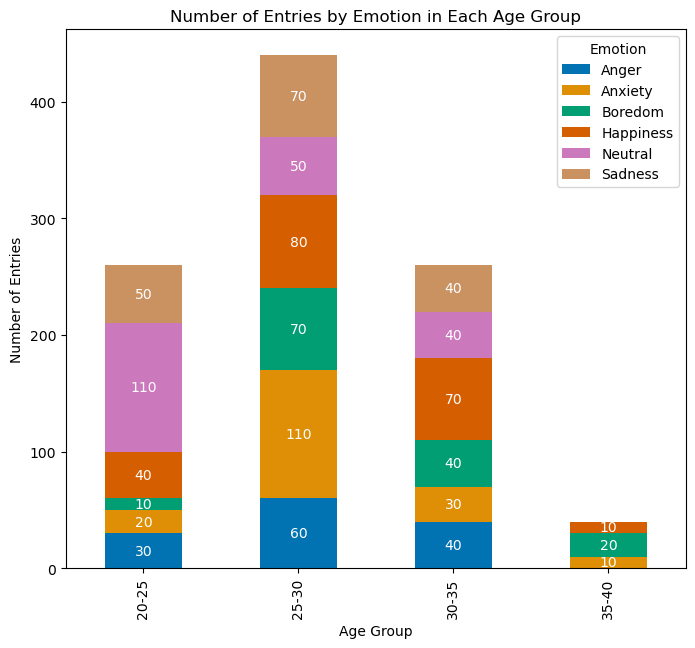

In [104]:
# Create new df to store information in
age_db_columns = ["Dominant_Emotion", "Age"]
socialmedia_age_db = socialmedia_db[age_db_columns]

# Create bins and labels for categorial 5 year increments
bins = range(0, socialmedia_age_db["Age"].max()+6, 5)
labels = [f'{i}-{i+5}' for i in bins[:-1]]

# Use pandas cut to split up via the bins and labels
socialmedia_age_db['Age'] = pd.cut(socialmedia_age_db['Age'], bins=bins, labels=labels, right=False)

# Group by age groups and count the amount of entries, filtering out any age groups that are empty
emotion_counts = socialmedia_age_db.groupby(['Age', 'Dominant_Emotion']).size().unstack()
emotion_counts = emotion_counts.loc[(emotion_counts.sum(axis=1) > 0)]

# Setting a colorblind-friendly palette
color_palette = sns.set_palette('colorblind')

# Display the count in a stacked bar chart
ax = emotion_counts.plot(kind='bar', stacked=True, figsize=(8, 7), color=color_palette)
plt.xlabel('Age Group')
plt.ylabel('Number of Entries')
plt.title('Number of Entries by Emotion in Each Age Group')
plt.legend(title='Emotion')

# Display the counts over each segment
for age in emotion_counts.index:
    for emotion in emotion_counts.columns:
        count = emotion_counts.at[age, emotion] #Getting the amount per age group and emotion
        if count > 0: #Check for any emotions that are empty
            x = emotion_counts.index.get_loc(age)
            y = emotion_counts.loc[age].cumsum().shift(1).fillna(0)[emotion] + count / 2
            ax.text(x, y, str(int(count)), ha='center', va='center', color='white')

# Save and display image
plt.savefig('../img/Age_to_Emotion_Bar.png', bbox_inches='tight')
plt.show()

Correlation matrix of age, gender, daily usage, emotional status

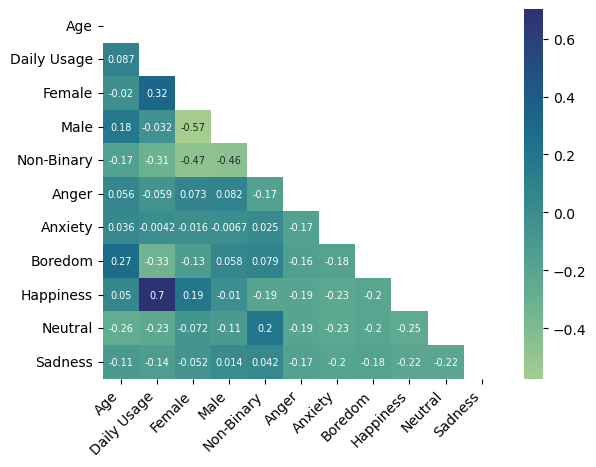

In [105]:
# Set df to desired columns for corr
corr_matrix1_columns = ["Age", "Gender", "Daily_Usage_Time (minutes)", "Dominant_Emotion"]
corr_matrix1 = socialmedia_db[corr_matrix1_columns]

# Change categorial variables into a workable format
corr_matrix1 = pd.get_dummies(corr_matrix1, columns=["Gender", "Dominant_Emotion"])
corr_matrix1 = corr_matrix1.corr()

# Define better labels 
custom_labels = ["Age", "Daily Usage", "Female", "Male", "Non-Binary", "Anger", "Anxiety", "Boredom", "Happiness", "Neutral", "Sadness"]

# Create matrix, and mask the upper half of the chart
mask = np.triu(corr_matrix1)
sns.heatmap(corr_matrix1, annot=True, cmap='crest', mask=mask, annot_kws={"size": 7})

# Ensure the number of labels matches the number of columns/rows in the correlation matrix
if corr_matrix1.shape[0] == len(custom_labels):
    plt.xticks(ticks=np.arange(len(custom_labels)) + 0.5, labels=custom_labels, rotation=45, ha='right')
    plt.yticks(ticks=np.arange(len(custom_labels)) + 0.5, labels=custom_labels, rotation=0)
else:
    print("The number of custom labels does not match the number of columns/rows in the correlation matrix.")
    print(f"Number provided: {len(custom_labels)}")
    print(f"Length required: {corr_matrix1.shape[0]}")

# Save and display image
plt.savefig('../img/Age_Gender_to_Emotion_Corr.png', bbox_inches='tight')
plt.show()

Correlation matrix of daily usage, posts, likes, messages, comment, emotional status

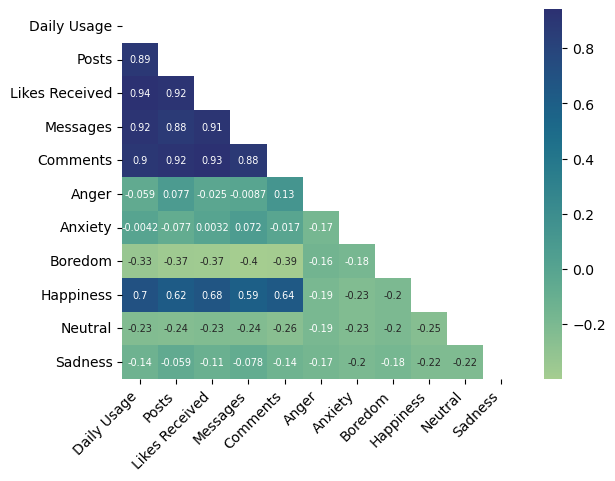

In [106]:
# Set df to desired columns for corr
all_columns = ['Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion']
corr_matrix2_columns = ["Daily_Usage_Time (minutes)", "Posts_Per_Day", "Likes_Received_Per_Day", "Messages_Sent_Per_Day", "Comments_Received_Per_Day", "Dominant_Emotion"]
corr_matrix2 = socialmedia_db[corr_matrix2_columns]

# Define better labels 
custom_labels = ["Daily Usage", "Posts", "Likes Received", "Messages", "Comments", "Anger", "Anxiety", "Boredom", "Happiness", "Neutral", "Sadness"]

# Change categorial variables into a workable format
corr_matrix2 = pd.get_dummies(corr_matrix2, columns=["Dominant_Emotion"])
corr_matrix2 = corr_matrix2.corr()

# Create matrix, and mask the upper half of the chart
mask = np.triu(corr_matrix2)
sns.heatmap(corr_matrix2, annot=True, cmap='crest', mask=mask, annot_kws={"size": 7});

# Ensure the number of labels matches the number of columns/rows in the correlation matrix
if corr_matrix2.shape[0] == len(custom_labels):
    plt.xticks(ticks=np.arange(len(custom_labels)) + 0.5, labels=custom_labels, rotation=45, ha='right')
    plt.yticks(ticks=np.arange(len(custom_labels)) + 0.5, labels=custom_labels, rotation=0)
else:
    print("The number of custom labels does not match the number of columns/rows in the correlation matrix.")
    print(f"Number provided: {len(custom_labels)}")
    print(f"Length required: {corr_matrix2.shape[0]}")

plt.savefig('../img/Use_to_Emotion_Corr.png', bbox_inches='tight')
plt.show()

Correlations of each platform, emotional status

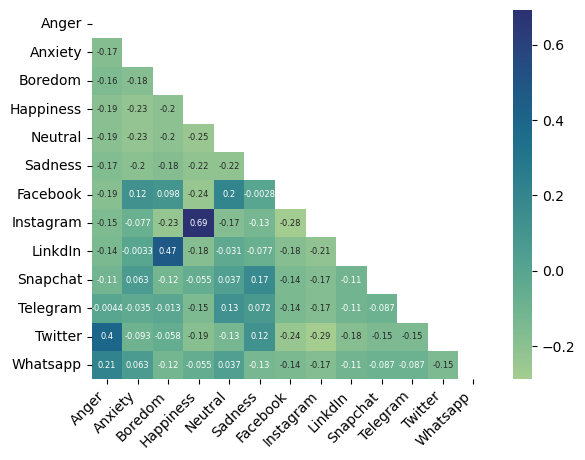

In [143]:
corr_matrix3_columns = ["Platform", "Dominant_Emotion"]
corr_matrix3 = socialmedia_db[corr_matrix3_columns]

# Change categorial variables into a workable format
corr_matrix3 = pd.get_dummies(corr_matrix3, columns=["Dominant_Emotion", "Platform"])
corr_matrix3 = corr_matrix3.corr()

# Define better labels 
custom_labels = ["Anger", "Anxiety", "Boredom", "Happiness", "Neutral", "Sadness", "Facebook", "Instagram", "LinkdIn", "Snapchat", "Telegram", "Twitter", "Whatsapp"]

# Create matrix, and mask the upper half of the chart
mask = np.triu(corr_matrix3)
sns.heatmap(corr_matrix3, annot=True, cmap='crest', mask=mask, annot_kws={"size": 6});

# Ensure the number of labels matches the number of columns/rows in the correlation matrix
if corr_matrix3.shape[0] == len(custom_labels):
    plt.xticks(ticks=np.arange(len(custom_labels)) + 0.5, labels=custom_labels, rotation=45, ha='right')
    plt.yticks(ticks=np.arange(len(custom_labels)) + 0.5, labels=custom_labels, rotation=0)
else:
    print("The number of custom labels does not match the number of columns/rows in the correlation matrix.")
    print(f"Number provided: {len(custom_labels)}")
    print(f"Length required: {corr_matrix3.shape[0]}")

plt.savefig('../img/Platform_to_Emotion_Corr.png', bbox_inches='tight')
plt.show()

#### Different ways to display the prior information

## Hypothesis Testing

* What is the hypothesis you want to test?
  * What is the null hypothesis you want to compare to?
* Do you have two logical groups or categories in the data that you want to compare?
* Would bootstrapping be useful to compare the two groups?
  * Is the data very small and/or oddly distributed?
  * Do you need to focus on how likely or unlikely it is for extreme values to
    occur in the data?
* How confident do you want to be in your conclusions?
  * What p-value threshold should you be under?

Hypothesis: Time spent on social media has a direct effect on emotion

In [108]:
# Get my df set up with Dominant_Emotion and Daily_Usage_Time (minutes)
hypothesis_columns = ["Dominant_Emotion", "Daily_Usage_Time (minutes)"]
test_socialmedia_df = socialmedia_db[hypothesis_columns]

Null Hypothesis: The variances of "Daily_Usage_Time" are equal across different "Dominant_Emotion" groups.

Alternative Hypothesis: At least one group has a variance that is different from the others.

In [111]:
# Give each emotion an arbitrary number value (ie. 1 = happy, 2 = sad, etc.)
emotion_arr = ['Happiness', 'Anger', 'Neutral', 'Anxiety', 'Boredom', 'Sadness']
emotion_dict = {}
for i in range(0, len(emotion_arr)):
    emotion_dict[emotion_arr[i]] = i+1

# Replace emotions with dict values in df
test_socialmedia_df['Dominant_Emotion'] = test_socialmedia_df['Dominant_Emotion'].replace(emotion_dict)

C:\Users\amhea\AppData\Local\Temp\ipykernel_22592\2365102266.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_socialmedia_df['Dominant_Emotion'] = test_socialmedia_df['Dominant_Emotion'].replace(emotion_dict)


All emotions to time spent Pearson correlation

In [112]:
# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(test_socialmedia_df['Dominant_Emotion'], test_socialmedia_df['Daily_Usage_Time (minutes)'])

print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Interpretation: A correlation coefficient close to 1 or -1 indicates a strong relationship.
# A p-value < 0.05 indicates the correlation is statistically significant.

Pearson correlation coefficient: -0.5396408800429509
P-value: 1.1931272746862407e-76


Each emotion to time spent Pearson correlation

In [113]:
# Loop through unique emotions (numerical values) and calculate correlation
unique_emotions = test_socialmedia_df['Dominant_Emotion'].unique()

for emotion_value in unique_emotions:
    # Assign to temp df and replace any emotion values that are not the currently selected with 0
    subset_df = test_socialmedia_df.copy()
    subset_df.loc[subset_df['Dominant_Emotion'] != emotion_value, 'Dominant_Emotion'] = 0
    subset_df.loc[subset_df['Dominant_Emotion'] == emotion_value, 'Dominant_Emotion'] = 1

    # Get dict key name for display later
    emotion = ""
    for key in emotion_dict:
        if emotion_dict[key] == emotion_value:
            emotion = key
    
    # Check if there's enough data and variability
    if subset_df.shape[0] > 1:
        daily_usage_time = subset_df['Daily_Usage_Time (minutes)']
        
        # Make sure daily usage time is not all repeat or assumed values
        if daily_usage_time.nunique() > 1:
            corr, p_val = pearsonr(daily_usage_time, subset_df['Dominant_Emotion'])
            print(f'Emotion Value: {emotion}')
            print(f'Correlation coefficient: {corr}')
            print(f'P-value: {p_val}')
        else:
            print(f'Emotion Value: {emotion} - Daily_Usage_Time has no variance (constant values).')
    else:
        print(f'Emotion Value: {emotion} - Not enough data points.')
    print('-' * 30)

Emotion Value: Happiness
Correlation coefficient: 0.7024025007688279
P-value: 1.571471817667403e-149
------------------------------
Emotion Value: Anger
Correlation coefficient: -0.05923116918731677
P-value: 0.061157451336261916
------------------------------
Emotion Value: Neutral
Correlation coefficient: -0.23434877202553017
P-value: 6.084063775083197e-14
------------------------------
Emotion Value: Anxiety
Correlation coefficient: -0.004216313536894743
P-value: 0.8940625955767559
------------------------------
Emotion Value: Boredom
Correlation coefficient: -0.3327183742368559
P-value: 2.8281079416464923e-27
------------------------------
Emotion Value: Sadness
Correlation coefficient: -0.13712020972567962
P-value: 1.3535336135392227e-05
------------------------------


T-Test for each emotion to time spent

In [148]:
unique_emotions = test_socialmedia_df['Dominant_Emotion'].unique()

for emotion_value in unique_emotions:
    # Create a copy of the DataFrame
    subset_df = test_socialmedia_df.copy()
    
    # Replace non-matching emotion values with 0, and matching with 1
    subset_df.loc[subset_df['Dominant_Emotion'] != emotion_value, 'Dominant_Emotion'] = 0
    subset_df.loc[subset_df['Dominant_Emotion'] == emotion_value, 'Dominant_Emotion'] = 1

    # Get the corresponding emotion name
    emotion = next((key for key in emotion_dict if emotion_dict[key] == emotion_value), "Unknown")
    
    # Split the data into two groups based on the 'Dominant_Emotion' value
    group1 = subset_df[subset_df['Dominant_Emotion'] == 1]['Daily_Usage_Time (minutes)']
    group2 = subset_df[subset_df['Dominant_Emotion'] == 0]['Daily_Usage_Time (minutes)']
    
    # Check if both groups have enough data and variability
    if len(group1) > 1 and len(group2) > 1:
        # Perform t-test
        t_stat, p_val = ttest_ind(group1, group2, equal_var=False)  # Welch's t-test
        
        print(f'Emotion: {emotion}')
        print(f'T-statistic: {t_stat}')
        print(f'P-value: {p_val}')
    else:
        print(f'Emotion: {emotion} - Not enough data points in one or both groups.')
    print('-' * 30)

Emotion: Happiness
T-statistic: 30.975362701817613
P-value: 5.129037878028241e-96
------------------------------
Emotion: Anger
T-statistic: -3.5242634042544436
P-value: 0.000465980235315997
------------------------------
Emotion: Neutral
T-statistic: -10.34249776804165
P-value: 5.834983440565121e-23
------------------------------
Emotion: Anxiety
T-statistic: -0.1383342901601676
P-value: 0.8900863394074395
------------------------------
Emotion: Boredom
T-statistic: -22.073803193060304
P-value: 4.855871375992328e-82
------------------------------
Emotion: Sadness
T-statistic: -5.54365454323335
P-value: 6.527112857189835e-08
------------------------------


## Regression and Predictions

### Model Building

* Does the data meet the assumptions of linear or logistic regression models?
  * For example
    * Linearity
    * Homoscedasticity

In [144]:
# Code Here


### Model Evaluation

* How did the model perform?
  * Did you use tools like those below to evaluate your model?
    * R-square (R2)
    * Confusion matrix
    * Mean squared error (MSE)
* Did you split your data into training and testing?
* Does your model perform equally or much worse on your testing data?
  * Could your model be overfit?
* How will this model likely perform in the real world?
* What are you coefficients?
  * What do the coefficients tell us about which feature is most important?
  * Can we trust the coefficients if the data isn't scaled?

In [145]:
# Code Here